In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis

#### Implementing PCA

In [3]:
data = pd.read_csv("imputed_data_Economic.csv")

numeric_data = data.drop(columns=['Country', 'Year'])
numeric_data = numeric_data.dropna()

numeric_data_standardized = (numeric_data - numeric_data.mean()) / numeric_data.std()

pca = PCA()
pca.fit(numeric_data_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var * 100:.2f}% variance explained")

PC1: 44.69% variance explained
PC2: 18.30% variance explained
PC3: 16.72% variance explained
PC4: 15.05% variance explained
PC5: 3.55% variance explained
PC6: 1.69% variance explained


### Factor Analysis

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

np.float64(0.7123334687790926)

In [5]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df_scaled)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([2.68139571, 1.09828197, 1.00339167, 0.90285566, 0.21295858,
       0.10111642])

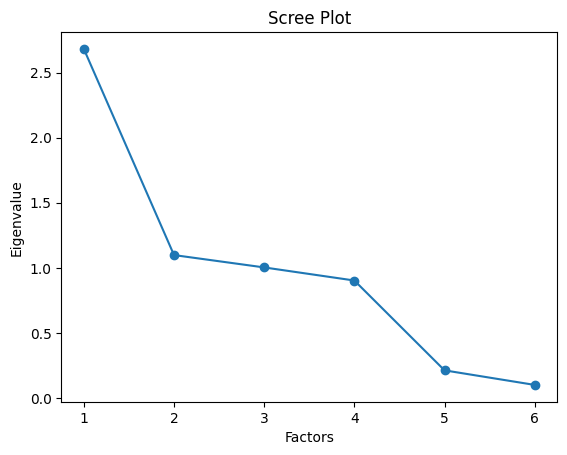

In [6]:
import matplotlib.pyplot as plt
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [9]:
columns_for_fa = [
    'Inflation_Rate','GDP_Per_Capita','GDP_Growth_Rate','Unemployment_Rate','Cost of Living Index',
    'Local Purchasing Power Index'
]
data = data.dropna()
data_filled = data[columns_for_fa]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

fa = FactorAnalysis(n_components=1)

factor_scores = fa.fit_transform(data_scaled)

data['Economic_Index_FA'] = factor_scores.round(3)

pca = PCA(n_components=1)
pca_scores = pca.fit_transform(data_scaled)
data['Economic_Index_PCA'] = pca_scores.round(3)

data.to_csv("Economic_Index.csv",index=False)

C:\Users\Tanay\AppData\Local\Temp\ipykernel_18556\191756156.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Economic_Index_FA'] = factor_scores.round(3)
C:\Users\Tanay\AppData\Local\Temp\ipykernel_18556\191756156.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Economic_Index_PCA'] = pca_scores.round(3)
